In [1]:
import tensorflow
from tensorflow import keras
from matplotlib import pyplot
import os
import cv2
import random
import pickle
import numpy

In [2]:
Dir="D:\\image_set\\image_set"
def create_data(Dir):
    global category
    global data
    data=[]
    category=os.listdir(Dir)
    for a in category:
        path=f"{Dir}\\{a}"
        classname=category.index(a)
        for file in os.listdir(path):
            try:
                img=cv2.imread  (f"{path}\\{file}")
                img=cv2.resize(img,(224,224))
                data.append([img,classname])
            except:
                pass

    

In [3]:
create_data(Dir)
random.shuffle(data)
with open("E:\\HWrgbdelbig.pickle","wb") as e:
    pickle.dump(data,e)

In [1]:
import tensorflow
from tensorflow import keras
from matplotlib import pyplot
import matplotlib
import os
import cv2
import random
import pickle
import numpy


In [2]:
with open("E:\\HWrgbdelbig.pickle","rb") as e:
    data=pickle.load(e)
    print(len(data))
    random.shuffle(data)

13882


In [3]:
train=[]
ans=[]
for a,b in data:
    train.append(a)
    ans.append(b)

train=numpy.array(train).reshape(-1,224,224,3)
ans=numpy.array(ans)
x=train[500:]
y=ans[500:]
data=[]

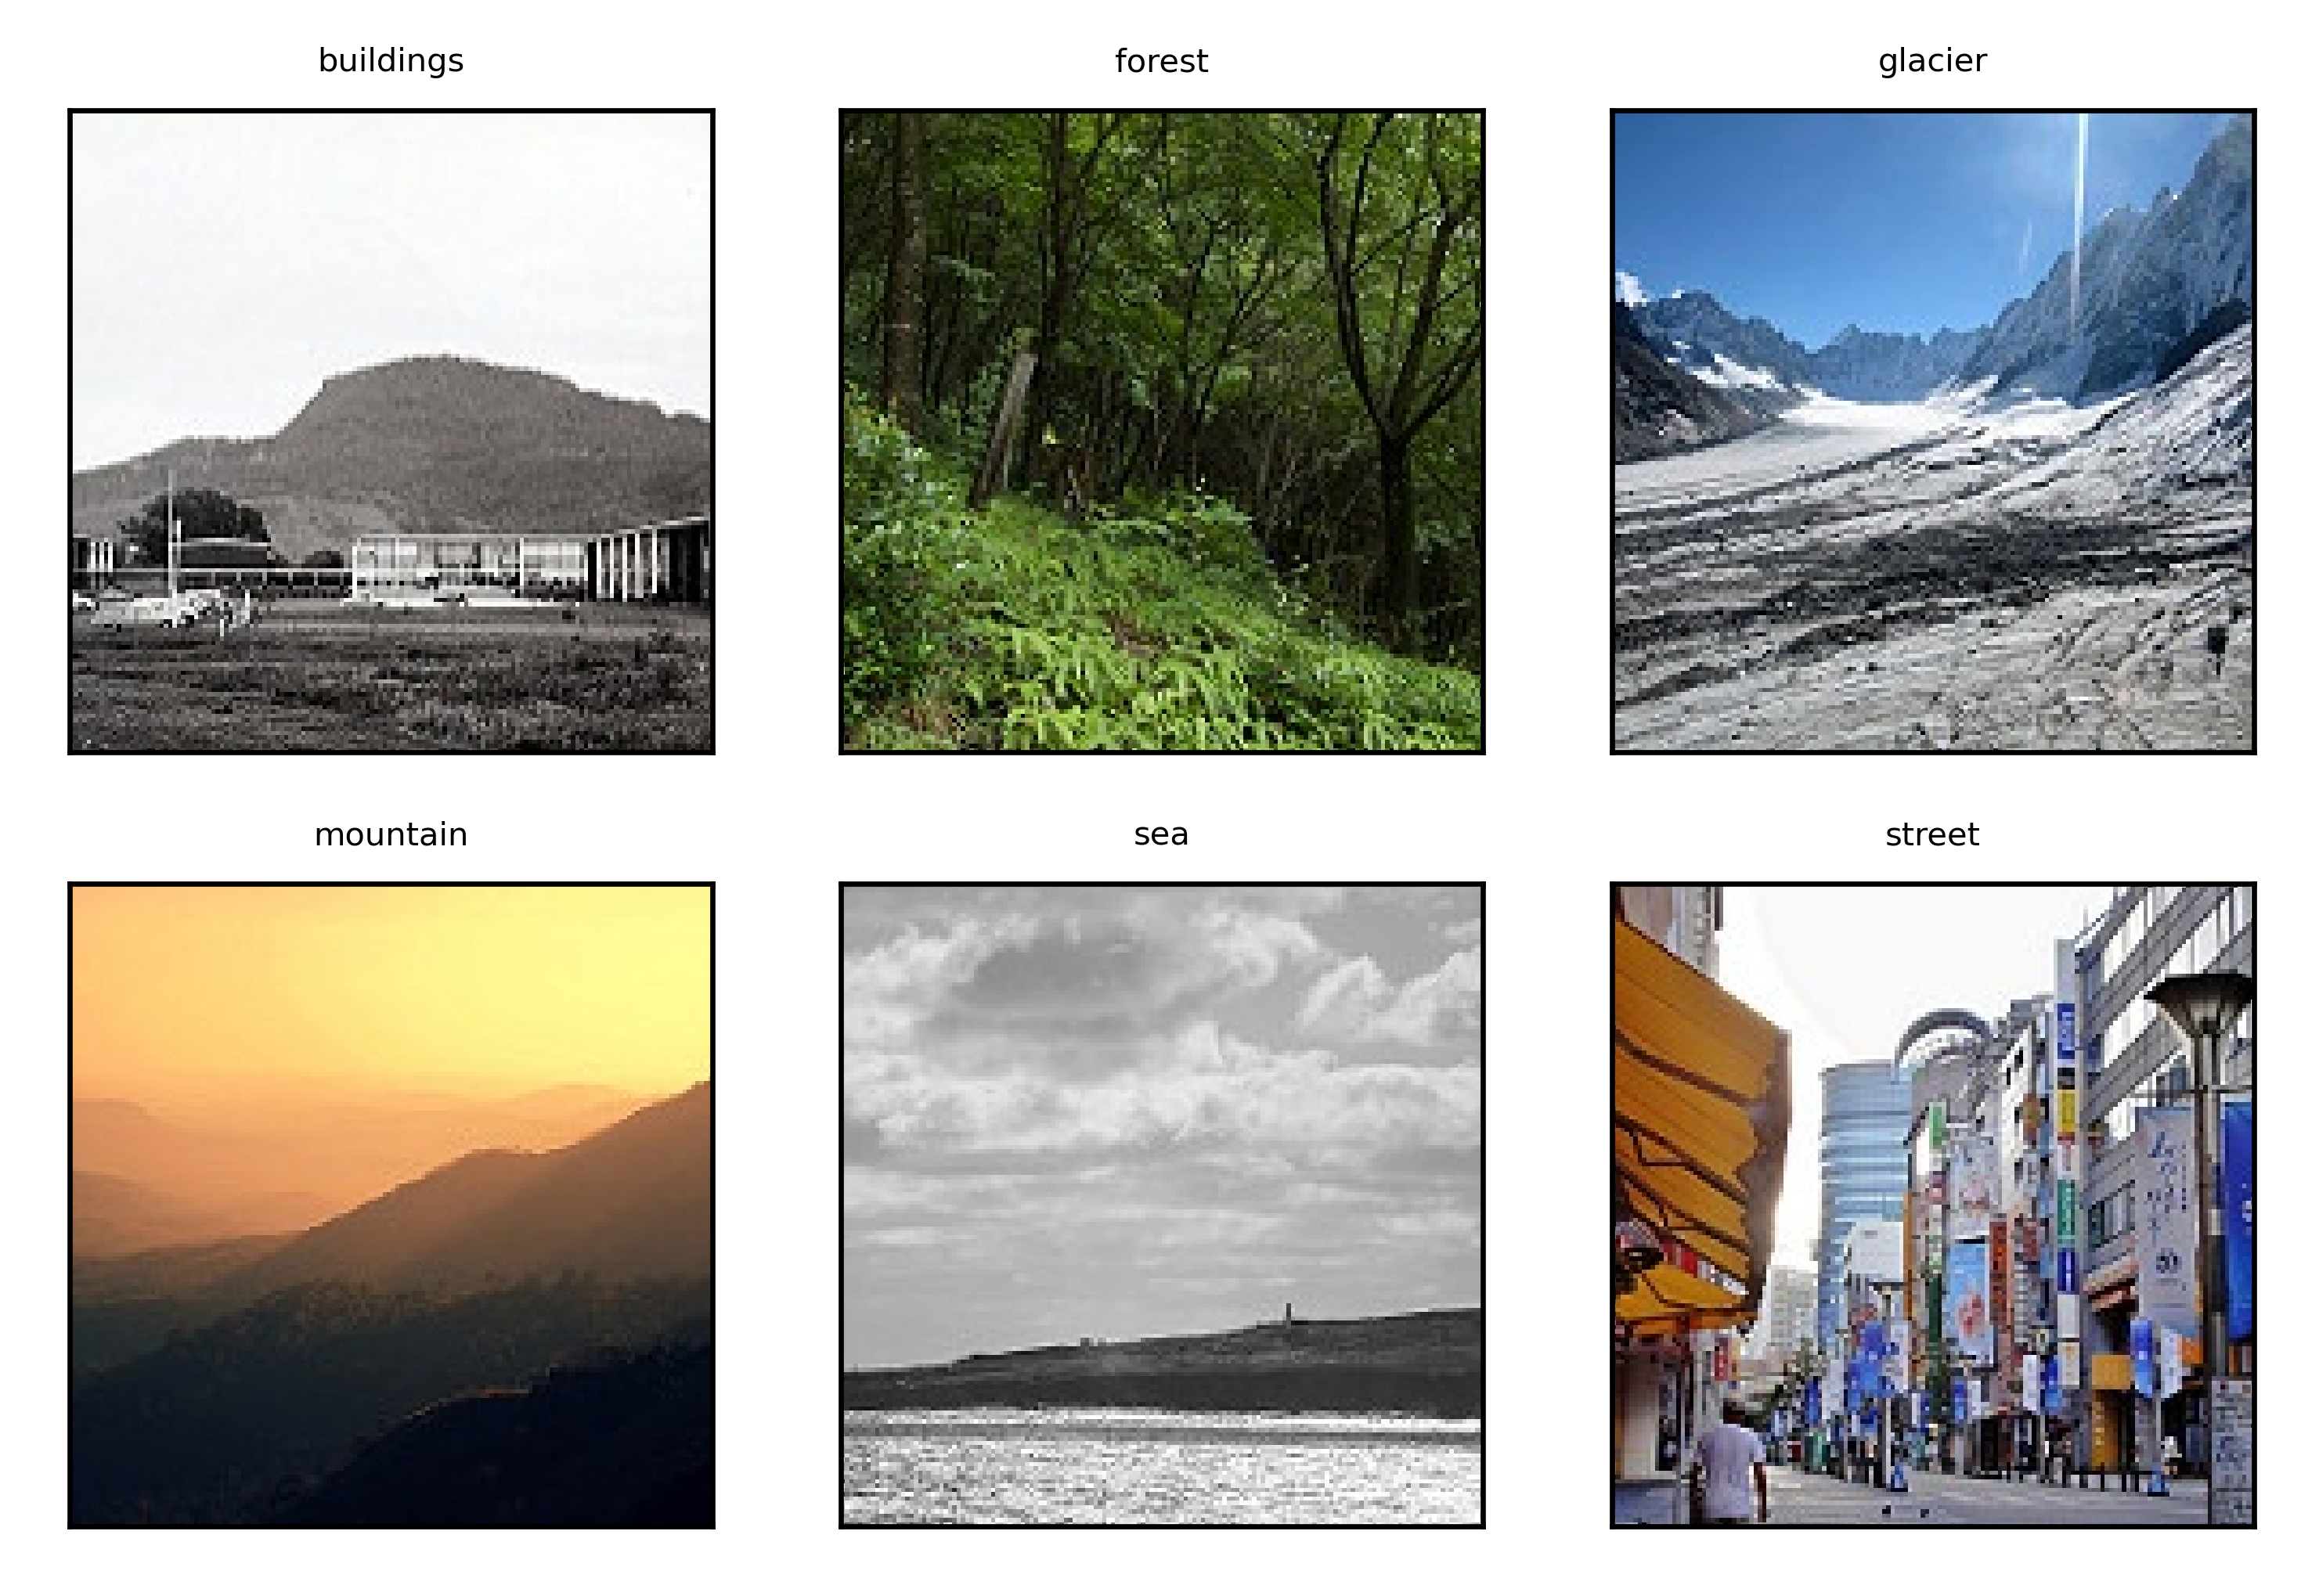

In [4]:
path="D:\\image_set\\image_set"
category=os.listdir(path)
matplotlib.pyplot.figure(dpi=600)
for c in category:
    ind=category.index(c)
    pyplot.subplot(23*10+ind+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pic=os.listdir(path+'\\'+c)
    pic=cv2.imread(f'{path}\\{c}\\{pic[0]}')
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    pyplot.title(c[:-4],fontdict={'fontsize':5})
    pyplot.imshow(pic)
pyplot.show()
    
               

# resnet keep all weight

In [5]:
resnet=tensorflow.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=x.shape[1:])
# Freeze the layers except the last 10 layers
for layer in resnet.layers:
    layer.trainable = False
model=keras.Sequential([
    resnet,
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x,y,epochs=20)
model.evaluate(train[:500],ans[:500])

Train on 13382 samples
Epoch 1/20
13382/13382 [==============================] - 74s 6ms/sample - loss: 0.9170 - accuracy: 0.8494
Epoch 2/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.6552 - accuracy: 0.9082
Epoch 3/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.5891 - accuracy: 0.9200
Epoch 4/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.5358 - accuracy: 0.9327
Epoch 5/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.5228 - accuracy: 0.9348
Epoch 6/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.5139 - accuracy: 0.9422
Epoch 7/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.5461 - accuracy: 0.9434
Epoch 8/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.4719 - accuracy: 0.9509
Epoch 9/20
13382/13382 [==============================] - 73s 5ms/sample - loss: 0.5535 - accuracy: 0.9485
Epoch 10/20
13

[2.6189009838104247, 0.874]

# resnet last 10 layer trainable

In [6]:
resnet=tensorflow.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=x.shape[1:])
# Freeze the layers except the last 10 layers
for layer in resnet.layers[:-10]:
    layer.trainable = False
for layer in resnet.layers[-10:]:
    layer.trainable=True
model=keras.Sequential([
    resnet,
    keras.layers.AveragePooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x,y,epochs=20)
model.evaluate(train[:500],ans[:500])

Train on 13382 samples
Epoch 1/20
13382/13382 [==============================] - 85s 6ms/sample - loss: 0.5114 - accuracy: 0.8730
Epoch 2/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.3576 - accuracy: 0.9209
Epoch 3/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.2913 - accuracy: 0.9381
Epoch 4/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.2085 - accuracy: 0.9503
Epoch 5/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.1830 - accuracy: 0.9596
Epoch 6/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.1645 - accuracy: 0.9620
Epoch 7/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.1754 - accuracy: 0.9653
Epoch 8/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.1385 - accuracy: 0.9710
Epoch 9/20
13382/13382 [==============================] - 83s 6ms/sample - loss: 0.1654 - accuracy: 0.9693
Epoch 10/20
13

[1.2766833658218384, 0.894]

# Conv 88%

In [6]:
model=keras.Sequential([

    
    
    keras.layers.Conv2D(16,(3,3),use_bias=False,input_shape=(x.shape[1:])),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(16,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.MaxPooling2D(2,2),
                                    
    keras.layers.Conv2D(32,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
                                    
    keras.layers.Conv2D(32,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.MaxPooling2D(2,2),
                                    
    keras.layers.Conv2D(64,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
                                    
    keras.layers.Conv2D(64,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
                                    
    keras.layers.Conv2D(128,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(128,(3,3),use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.MaxPooling2D(2,2),                       
                                    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2048,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2048,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x,y,epochs=20)
model.evaluate(train[:500],ans[:500])

Train on 13382 samples
Epoch 1/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 1.6077 - accuracy: 0.4744
Epoch 2/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.9838 - accuracy: 0.6039
Epoch 3/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.8394 - accuracy: 0.6798
Epoch 4/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.7224 - accuracy: 0.7379
Epoch 5/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.6538 - accuracy: 0.7642
Epoch 6/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.6182 - accuracy: 0.7764
Epoch 7/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.5723 - accuracy: 0.7991
Epoch 8/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.5464 - accuracy: 0.8080
Epoch 9/20
13382/13382 [==============================] - 39s 3ms/sample - loss: 0.5051 - accuracy: 0.8189
Epoch 10/20
13

[0.341099657535553, 0.882]